### Import Library

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%reload_ext autoreload

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import os
import sys

In [7]:
sys.path.append(os.path.abspath('../src/'))

### 1. Prepare and Load the dataset

##### import the dataloader

In [8]:
from data_process import data_loader, random_sample_large_csv

In [6]:
input_file = "../data/complaints.csv"
output_file = "../data/processed_complaints.csv"

# Ensure output directory exists
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Process the large CSV file
random_sample_large_csv(input_file, output_file, chunk_size=50_000, target_rows=1_000_000)

2025-07-10 14:12:40,538 - INFO - 🔄 Reading chunk 1
2025-07-10 14:12:40,705 - INFO - ✅ Sampled 50000 rows from chunk 1 (Total: 50000)
2025-07-10 14:12:43,767 - INFO - 🔄 Reading chunk 2
2025-07-10 14:12:43,879 - INFO - ✅ Sampled 50000 rows from chunk 2 (Total: 100000)
2025-07-10 14:12:45,320 - INFO - 🔄 Reading chunk 3
2025-07-10 14:12:45,447 - INFO - ✅ Sampled 50000 rows from chunk 3 (Total: 150000)
2025-07-10 14:12:46,867 - INFO - 🔄 Reading chunk 4
2025-07-10 14:12:46,989 - INFO - ✅ Sampled 50000 rows from chunk 4 (Total: 200000)
2025-07-10 14:12:48,485 - INFO - 🔄 Reading chunk 5


c:\Users\Tegbabu\Intelligent-Complaint-Analysis-FinancialServices\src\data_process.py:64: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  for i, chunk in enumerate(pd.read_csv(input_path, chunksize=chunk_size, encoding='utf-8', on_bad_lines='skip')):


2025-07-10 14:12:48,684 - INFO - ✅ Sampled 50000 rows from chunk 5 (Total: 250000)
2025-07-10 14:12:51,712 - INFO - 🔄 Reading chunk 6
2025-07-10 14:12:51,931 - INFO - ✅ Sampled 50000 rows from chunk 6 (Total: 300000)
2025-07-10 14:12:53,843 - INFO - 🔄 Reading chunk 7
2025-07-10 14:12:54,083 - INFO - ✅ Sampled 50000 rows from chunk 7 (Total: 350000)
2025-07-10 14:12:56,192 - INFO - 🔄 Reading chunk 8
2025-07-10 14:12:56,294 - INFO - ✅ Sampled 50000 rows from chunk 8 (Total: 400000)
2025-07-10 14:12:59,428 - INFO - 🔄 Reading chunk 9
2025-07-10 14:12:59,611 - INFO - ✅ Sampled 50000 rows from chunk 9 (Total: 450000)
2025-07-10 14:13:01,848 - INFO - 🔄 Reading chunk 10
2025-07-10 14:13:02,010 - INFO - ✅ Sampled 50000 rows from chunk 10 (Total: 500000)
2025-07-10 14:13:04,022 - INFO - 🔄 Reading chunk 11
2025-07-10 14:13:04,176 - INFO - ✅ Sampled 50000 rows from chunk 11 (Total: 550000)
2025-07-10 14:13:06,112 - INFO - 🔄 Reading chunk 12
2025-07-10 14:13:06,329 - INFO - ✅ Sampled 50000 rows fro

In [9]:
df = data_loader('../data/processed_complaints.csv')

2025-07-10 14:27:33,250 - INFO - Data loaded successfully from ../data/processed_complaints.csv


In [10]:
df.head()

,Consumer complaint narrative,Product,Issue,Company,Date received
0,"Sallie Mae charged off my debt, then sold it t...",Debt collection,Written notification about debt,SLM CORPORATION,2025-06-05
1,NaN,Debt collection,Attempts to collect debt not owed,"EQUIFAX, INC.",2025-06-20
2,NaN,Credit reporting or other personal consumer re...,Improper use of your report,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",2025-06-20
3,NaN,Credit reporting or other personal consumer re...,Incorrect information on your report,Experian Information Solutions Inc.,2025-06-19
4,NaN,Credit reporting or other personal consumer re...,Incorrect information on your report,Experian Information Solutions Inc.,2025-06-18


### 2. Initial EDA

In [11]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (1000000, 5)

Column Names: ['Consumer complaint narrative', 'Product', 'Issue', 'Company', 'Date received']

Missing Values:
 Consumer complaint narrative    853811
Product                              0
Issue                                0
Company                              0
Date received                        0
dtype: int64

Data Types:
 Consumer complaint narrative    object
Product                         object
Issue                           object
Company                         object
Date received                   object
dtype: object


### 3. Analyze distribution of complaints across Products

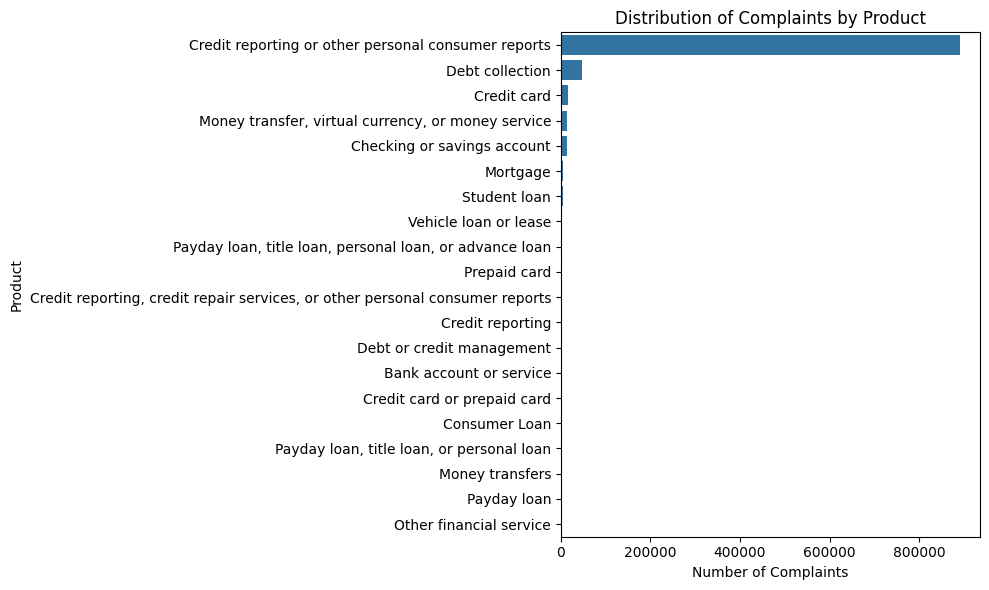

In [12]:
product_counts = df['Product'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_counts.values, y=product_counts.index)
plt.title('Distribution of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

### 4. Calculate and visualize narrative length

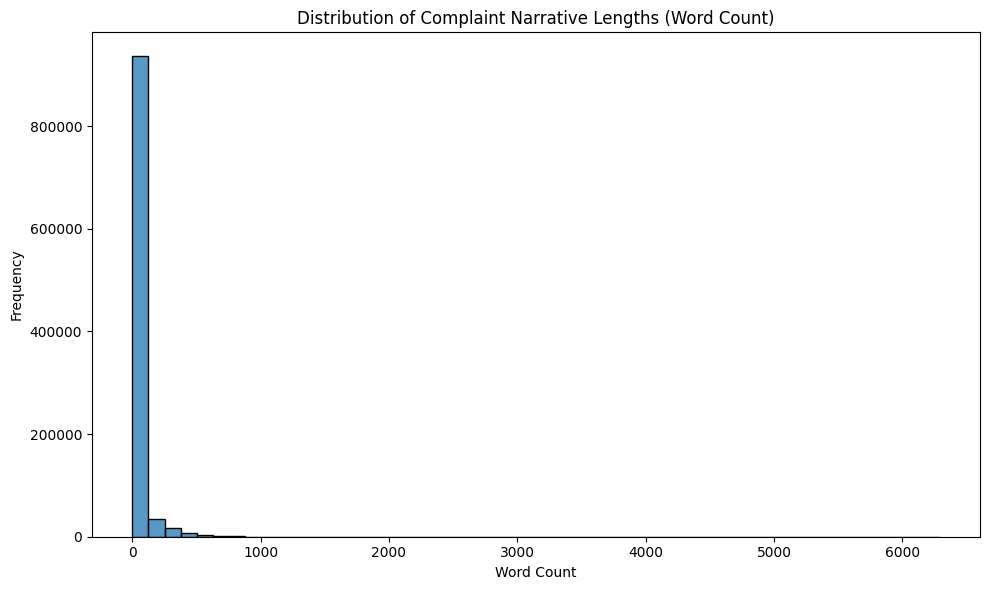

In [13]:
df['narrative_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'], bins=50)
plt.title('Distribution of Complaint Narrative Lengths (Word Count)')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [14]:
# Print narrative length statistics
print("\nNarrative Length Statistics:")
print(df['narrative_length'].describe())
print(f"\nVery short narratives (<10 words): {(df['narrative_length'] < 10).sum()}")
print(f"Very long narratives (>500 words): {(df['narrative_length'] > 500).sum()}")


Narrative Length Statistics:
count    1000000.000000
mean          24.474938
std           94.053340
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max         6291.000000
Name: narrative_length, dtype: float64

Very short narratives (<10 words): 854207
Very long narratives (>500 words): 6186


### 5. Count complaints with and without narratives

In [15]:
print("\nComplaints with Narratives:", df['Consumer complaint narrative'].notnull().sum())
print("Complaints without Narratives:", df['Consumer complaint narrative'].isnull().sum())



Complaints with Narratives: 146189
Complaints without Narratives: 853811


### 6. Filter dataset for specified products

In [16]:
target_products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later (BNPL)', 'Savings account', 'Money transfers']
df_filtered = df[df['Product'].isin(target_products)]

In [17]:
df_filtered.head()

,Consumer complaint narrative,Product,Issue,Company,Date received,narrative_length
23,NaN,Credit card,Getting a credit card,CAPITAL ONE FINANCIAL CORPORATION,2025-06-08,0
38,Two transactions were done through Citi bank a...,Credit card,Problem with a purchase shown on your statement,"CITIBANK, N.A.",2025-06-02,180
84,NaN,Credit card,Fees or interest,SYNCHRONY FINANCIAL,2025-03-20,0
98,NaN,Credit card,Problem with a purchase shown on your statement,CAPITAL ONE FINANCIAL CORPORATION,2025-06-07,0
212,NaN,Credit card,Problem with a purchase shown on your statement,CAPITAL ONE FINANCIAL CORPORATION,2025-04-22,0


### 7. Remove records with empty narratives

In [18]:

df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull()]
print("\nShape after filtering products and removing empty narratives:", df_filtered.shape)


Shape after filtering products and removing empty narratives: (4541, 6)


### 8 Clean Text narrative

In [19]:
from data_process import clean_narrative

In [20]:
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_narrative)

In [23]:
df_filtered.head()

,Consumer complaint narrative,Product,Issue,Company,Date received,narrative_length,cleaned_narrative
38,Two transactions were done through Citi bank a...,Credit card,Problem with a purchase shown on your statement,"CITIBANK, N.A.",2025-06-02,180,two transactions were done through citi bank a...
1830,We called Citi Bank Customer Service on XX/XX/...,Credit card,Fees or interest,"CITIBANK, N.A.",2025-06-14,102,we called citi bank customer service on xxxxye...
2237,Case ID : XXXX Case : XXXX Case : XXXX Re : Fr...,Credit card,Problem with a purchase shown on your statement,"CITIBANK, N.A.",2025-06-03,476,case id xxxx case xxxx case xxxx re fraudulent...
2321,I have a Citi rewards cards. The credit balanc...,Credit card,Incorrect information on your report,"CITIBANK, N.A.",2025-06-12,233,i have a citi rewards cards. the credit balanc...
2571,AS I STATED I KEEP SENDING LETTERS AND ASKING ...,Credit card,Problem when making payments,ALLY FINANCIAL INC.,2025-05-14,47,as i stated i keep sending letters and asking ...


In [24]:
print(df_filtered.shape)

(4541, 7)


### 9. Save the cleaned and filtered dataset

In [25]:

df_filtered.to_csv('../data/filtered_complaints.csv', index=False)
print(f"\nCleaned dataset saved to: {'../data/filtered_complaints.csv'}")



Cleaned dataset saved to: ../data/filtered_complaints.csv


### 10. Summary statistics of filtered dataset

In [26]:

print("\nFiltered Dataset Summary:")
print("Shape:", df_filtered.shape)
print("\nProduct Distribution in Filtered Dataset:")
print(df_filtered['Product'].value_counts())
print("\nSample Cleaned Narratives (First 3):")
for i, narrative in enumerate(df_filtered['cleaned_narrative'].head(3)):
    print(f"\nSample {i+1}:")
    print(narrative[:200] + "..." if len(narrative) > 200 else narrative)


Filtered Dataset Summary:
Shape: (4541, 7)

Product Distribution in Filtered Dataset:
Product
Credit card        4539
Money transfers       2
Name: count, dtype: int64

Sample Cleaned Narratives (First 3):

Sample 1:
two transactions were done through citi bank and we have proven that two transactions were done as fraud. we were buying into xxxx xxxx for them to take over our existing timeshare. first amount of 12...

Sample 2:
we called citi bank customer service on xxxxyear to question a late fee 30.00 and an interest charge on our account 3.00 , as we always pay on time. the bill was due xxxxyear on a saturday, and we wer...

Sample 3:
case id xxxx case xxxx case xxxx re fraudulent xxxx charges xxxxyear 96.00 xxxxyear 160.00 xxxxyear xxxx i did not make any of the above charges and i did not authorize anyone to make these charges. t...


### Summary of EDA and Preprocessing Findings

The exploratory data analysis of the CFPB complaint dataset reveals key insights into its structure and content. The dataset contains a diverse set of complaints across multiple financial products, with the initial analysis showing the distribution of complaints across products, highlighting which financial products (e.g., Credit card, Personal loan) receive the most complaints. The narrative length analysis indicates a wide range of complaint lengths, with some narratives being very short (<10 words) and others excessively long (>500 words), suggesting variability in consumer detail. Complaints without narratives were identified, and these were excluded from the final dataset to ensure quality for the RAG pipeline.

After filtering for the specified products (Credit card, Personal loan, Buy Now, Pay Later, Savings account, Money transfers) and removing records with empty narratives, the dataset was significantly reduced in size, ensuring relevance and usability. Text cleaning involved lowercasing, removing special characters, and eliminating common boilerplate phrases to improve embedding quality. The cleaned dataset, saved as filtered_complaints.csv, retains essential metadata and cleaned narratives, making it suitable for downstream tasks like embedding and retrieval. The preprocessing steps ensure that the narratives are standardized and free of noise, enhancing the performance of the chatbot in answering queries based on real-world feedback.